# Análise e Visualização de Dados — Meteorite Landings

### Instalação de bibliotecas/pacotes

In [109]:
#pip3 install pandas
#pip3 install matplotlib

### Importando as bibliotecas

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

### Leitura dos Dados

In [118]:
# Lendo o dataset
df = pd.read_excel("meteorite_landings.xlsx")

# Visualizando as primeiras linhas
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


### Análise Exploratória — Verificando Dados

In [121]:
# Verificando dados ausentes
print(df.isnull().sum())

# Verificando informações gerais
print(df.info())

# Visualizando estatísticas básicas
print(df.describe())

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None
                 id      mass (g)          year        reclat       reclong
count  45716.000000  4.558500e+

### Tratamento de Dados

In [124]:
# Removendo possíveis outliers na longitude (valores maiores que 300 não fazem sentido no mapa)
df_clean = df[df["reclong"] < 300]

## Gráficos
### Gráfico de Linhas — Quantidade de Meteoritos por Ano

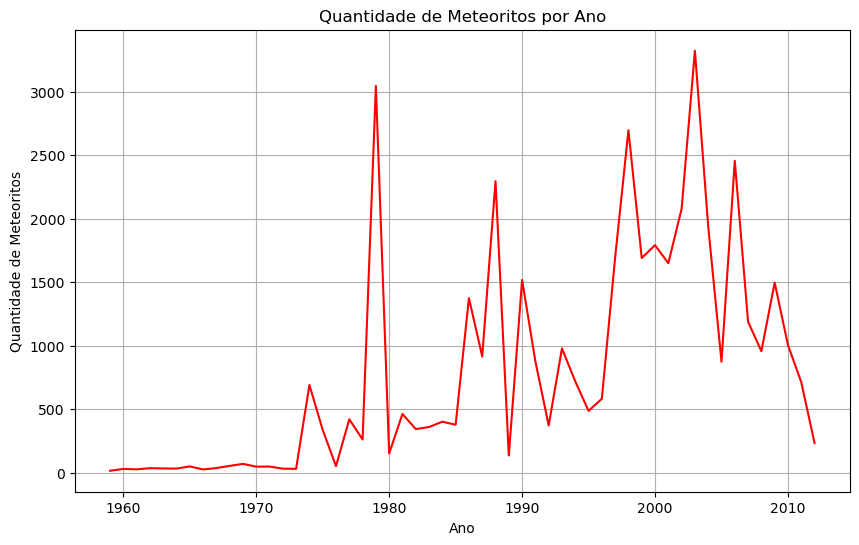

In [163]:
# Contagem de meteoritos por ano
d = df['year'].value_counts()
met = pd.DataFrame({'ano': d.index, 'cont': d.values}).sort_values(by='ano')

# Filtrando intervalo de anos
met = met[(met['ano'] > 1958) & (met['ano'] < 2013)]

# Plotando
plt.figure(figsize=(10,6))
plt.plot(met['ano'], met['cont'], color="red")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Meteoritos")
plt.title("Quantidade de Meteoritos por Ano")
plt.grid(True)
plt.show()

### Gráfico de Barras — Classes vs Média de Massa

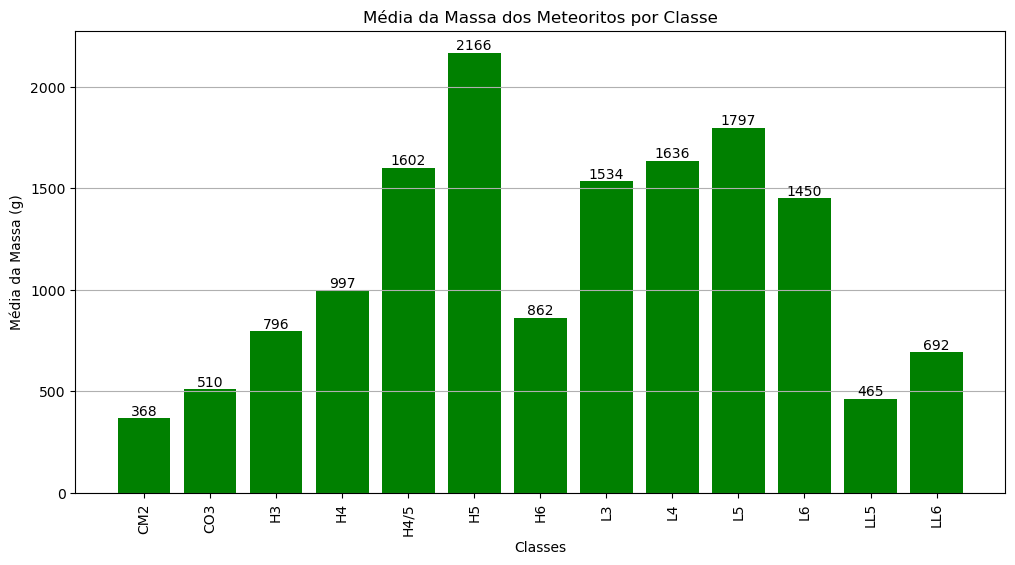

In [152]:
# Agrupando por classe
barras = df.groupby(by="recclass").agg({
    "mass (g)": "mean",
    "id": "count"
}).reset_index()

# Mantendo classes com mais de 300 registros
barras = barras[barras["id"] > 300]

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12,6))

# Plotando o gráfico de barras
bar_container = ax.bar(barras["recclass"], barras["mass (g)"], color="green")

# Labels e título
ax.set_xlabel("Classes")
ax.set_ylabel("Média da Massa (g)")
ax.set_title("Média da Massa dos Meteoritos por Classe")
ax.grid(axis='y')

# Adicionando os valores no topo das barras
ax.bar_label(bar_container, fmt='%.0f')

# Ajustando rotação para melhor visualização
plt.xticks(rotation=90)

plt.show()

### Gráfico de barras horizontal

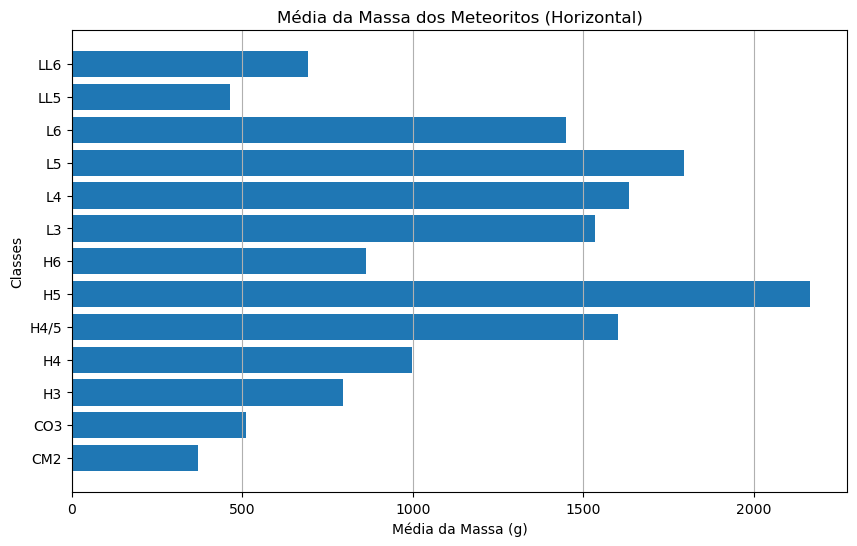

In [161]:
plt.figure(figsize=(10,6))
plt.barh(barras["recclass"], barras["mass (g)"])
plt.xlabel("Média da Massa (g)")
plt.ylabel("Classes")
plt.title("Média da Massa dos Meteoritos (Horizontal)")
plt.grid(axis='x')
plt.show()

### Gráfico de Dispersão — Localização dos Meteoritos

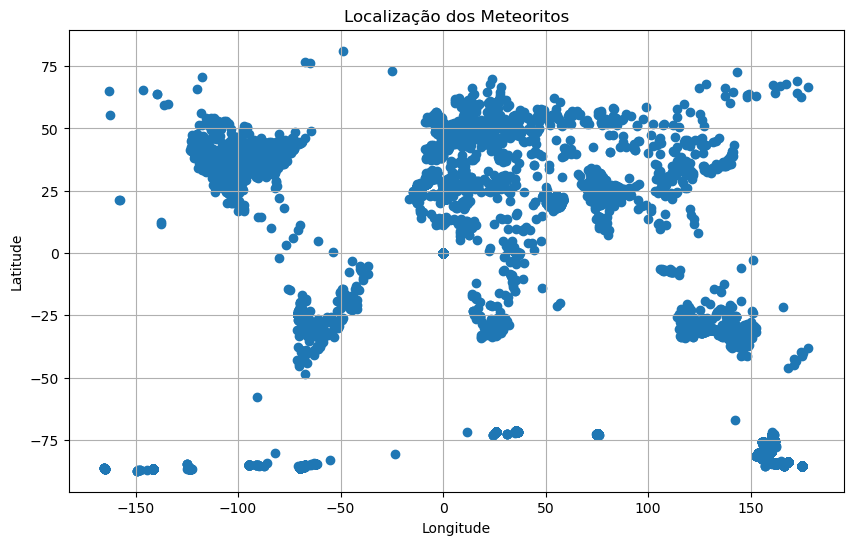

In [168]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["reclong"], df_clean["reclat"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localização dos Meteoritos")
plt.grid(True)
plt.show()

###  Salvando Gráfico
#### É preciso ter o código do gráfico na mesma célula

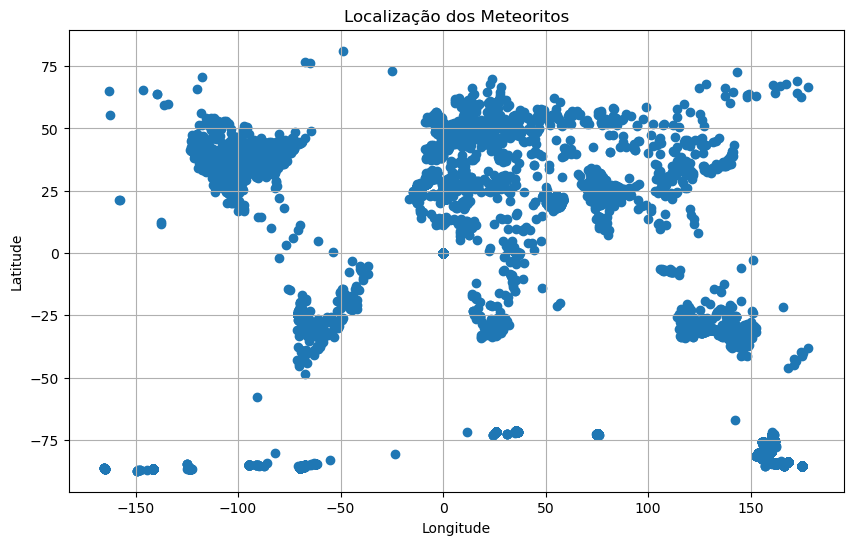

In [175]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["reclong"], df_clean["reclat"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localização dos Meteoritos")
plt.grid(True)
plt.savefig("mapa_dos_meteoritos.jpg")
plt.show()

## Histogramas — Distribuição dos Dados
### Histograma da Latitude

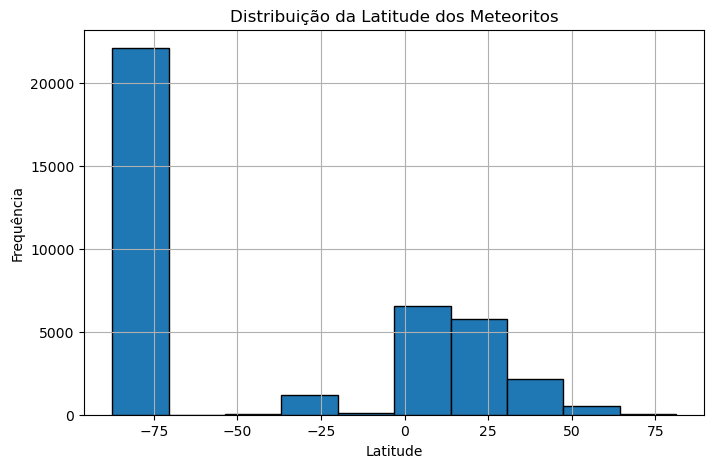

In [185]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["reclat"], bins=10, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Frequência")
plt.title("Distribuição da Latitude dos Meteoritos")
plt.grid(True)
plt.show()

### Histograma da Latitude — Variando Bins

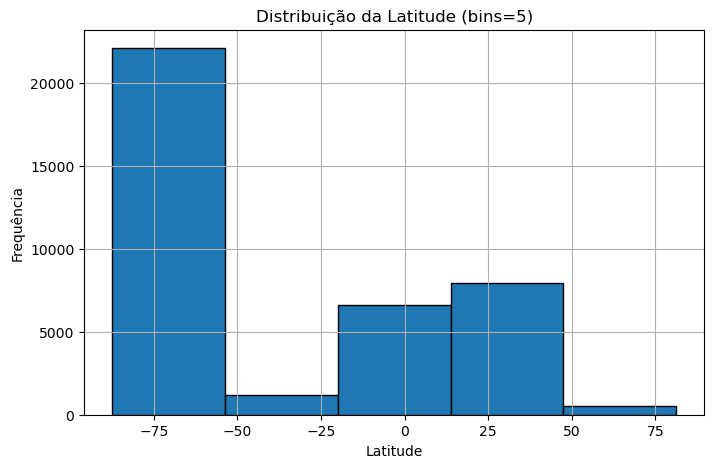

In [211]:
# Usando menos bins → menos divisões → barras mais largas

plt.figure(figsize=(8,5))
plt.hist(df_clean["reclat"], bins=5, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Frequência")
plt.title("Distribuição da Latitude (bins=5)")
plt.grid(True)
plt.show()

### Histograma da Longitude

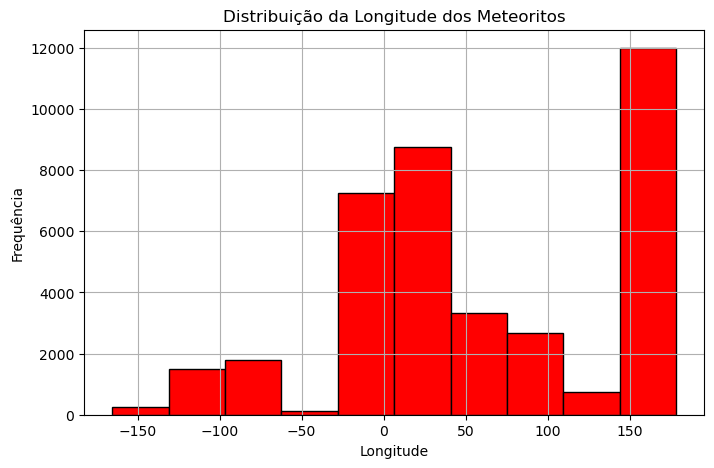

In [213]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["reclong"], bins=10, color='red', edgecolor='black')
plt.xlabel("Longitude")
plt.ylabel("Frequência")
plt.title("Distribuição da Longitude dos Meteoritos")
plt.grid(True)
plt.show()

# Mostra como os meteoritos estão distribuídos em relação à longitude.

### Histogramas em Subplots (Latitude e Longitude)

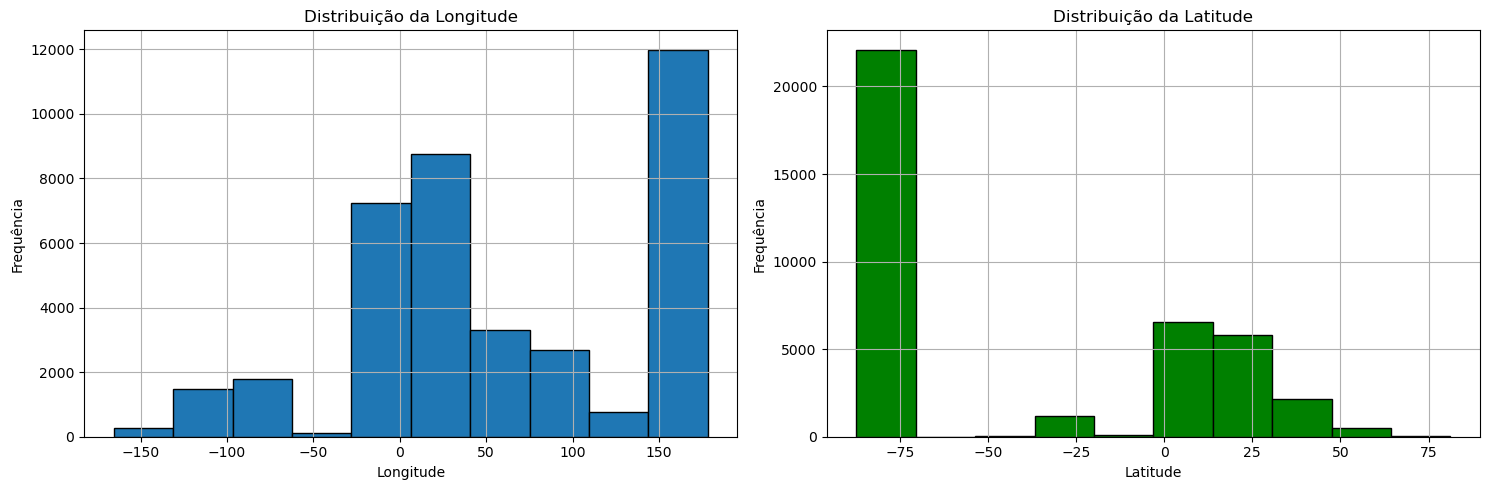

In [217]:
# Define o tamanho da figura
plt.figure(figsize=(15,5))

# Subplot 1 - Longitude
plt.subplot(1,2,1) # 1 linha, 2 colunas, posição 1
plt.hist(df_clean["reclong"], bins=10, edgecolor='black')
plt.xlabel("Longitude")
plt.ylabel("Frequência")
plt.title("Distribuição da Longitude")
plt.grid(True)

# Subplot 2 - Latitude
plt.subplot(1,2,2) # posição 2
plt.hist(df_clean["reclat"], bins=10, color="green", edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Frequência")
plt.title("Distribuição da Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

### Latitude e Longitude no mesmo gráfico

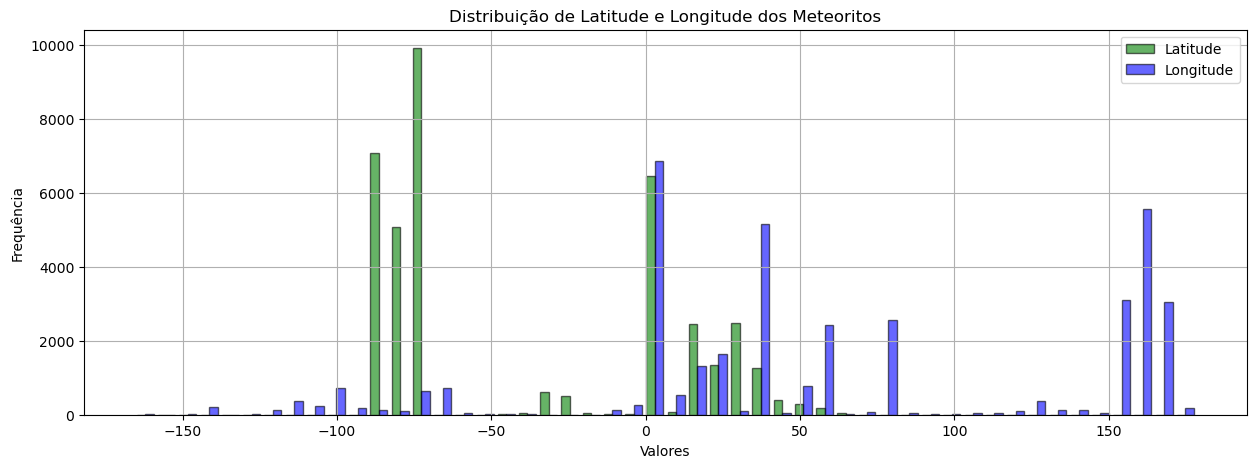

In [219]:
# Plotando Latitude e Longitude no mesmo gráfico
plt.figure(figsize=(15,5))
plt.hist(
    [df_clean['reclat'], df_clean['reclong']],
    bins=50,
    label=['Latitude', 'Longitude'],
    color=['green', 'blue'],
    alpha=0.6,
    edgecolor='black'
)
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Distribuição de Latitude e Longitude dos Meteoritos")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Variação de Bins no Histograma Conjunto

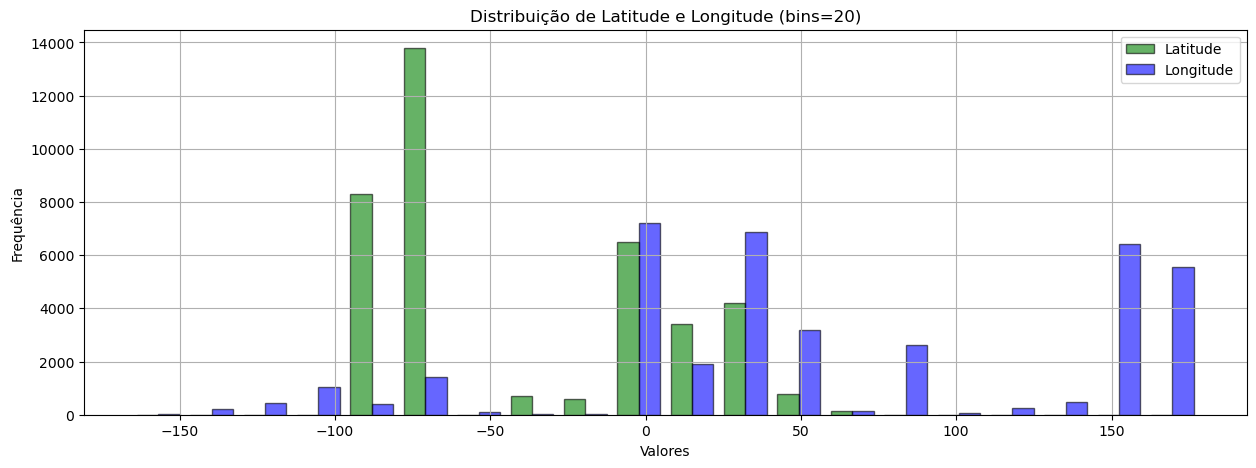

In [221]:
# Usando menos bins para simplificar a visualização
plt.figure(figsize=(15,5))
plt.hist(
    [df_clean['reclat'], df_clean['reclong']],
    bins=20,
    label=['Latitude', 'Longitude'],
    color=['green', 'blue'],
    alpha=0.6,
    edgecolor='black'
)
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Distribuição de Latitude e Longitude (bins=20)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()